In [1]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

54.099637218737826 42.45298893622186
59.90814393085071 117.39492236340323
-11.287689626847765 -54.62819430183367
-16.717028114569217 -101.2833229550137
55.339073746718725 -133.42687375196613
-13.442747103086035 115.44496149638223
-29.598466457595087 -79.70391613729471
2.02896342713791 125.77395958318624
-89.78751839850163 49.32416609105405
39.87469678981458 -80.78369263661135
5.605389058072973 167.47715982746
-87.93922906518067 -120.77974218941868
58.83327673806423 -15.451434515405026
-6.429008068445256 93.10978114867879
-43.1693778516006 -153.20352910953636
-59.98407360057024 -111.11612478558986
72.46725994126999 74.07765950951074
48.33695991373375 -142.06630170586058
-43.00817665748496 151.08298304665374
75.25858514839095 -32.00134783648275
46.51147719945246 162.17027082777423
19.168160562462944 -172.63708675400815
-49.97096159387277 152.24043094256825
-35.151024570052975 -88.19999681481352
51.63323085322784 -37.165451245713996
66.72561911441747 18.220167395973704
-11.67287202693413 

46.46643269167075 21.734355165330157
4.211735540635445 -128.69953898831392
38.02734202873941 167.04995372125444
-82.41788340899018 29.705345464303292
54.99836351468443 -58.62028702471325
-84.80305803464861 -108.98849053019684
64.83894737790766 26.095420440444144
71.72409461636579 47.310641064933975
38.23404161907388 -0.13438444751514567
45.2390125500678 122.7422102764811
20.201437695755203 56.293641606905766
43.12852760974755 -67.72940239480626
65.6414142972383 -31.057932087601728
55.08919536450665 116.6402540352675
82.14699011390792 121.83126028251633
-38.12398427776313 -61.43172522165733
-64.58437653617935 -82.08146897243108
-88.58133135116884 -11.477001484357572
74.00729979751986 -145.16487103237148
-25.409068699489097 143.86524487330246
70.66833142712858 -140.65177928430265
21.32307985212229 168.8514375152431
88.00772985850796 48.67125197484151
-70.63233164055701 -123.74587491102112
23.9620189379727 127.87968551053359
-26.126973717924223 146.5548833246936
-52.66447015821407 77.4114

In [5]:
# use the citipy module to determine city based on latitude and longitude
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# create a list for holding the cities
cities= []

# identify the nearest city for each lat and  long combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # if the city is unique, then add to cities list
    if city not in cities:
        cities.append(city)
        
# print the city count to confirmsufficient count
len(cities)

613

In [7]:
# import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [8]:
# create an empty list to hold the weather data
city_data = []

# print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# create counters
record_count = 1
set_count = 1


Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | vysha
Processing Record 2 of Set 1 | suntar
Processing Record 3 of Set 1 | alta floresta
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | ketchikan
Processing Record 6 of Set 1 | denpasar
Processing Record 7 of Set 1 | coquimbo
Processing Record 8 of Set 1 | bitung
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | moundsville
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | hofn
Processing Record 14 of Set 1 | padang
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | yar-sale
Processing Record 17 of Set 1 | sitka
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 20 of Set 1 | severo-kurilsk
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 1 | lebu
Processing Record 23 of Set 1 | nanortalik
Processing Record 24 of Se

Processing Record 40 of Set 4 | laguna
Processing Record 41 of Set 4 | kjollefjord
Processing Record 42 of Set 4 | karakol
Processing Record 43 of Set 4 | kastamonu
Processing Record 44 of Set 4 | raga
Processing Record 45 of Set 4 | flinders
Processing Record 46 of Set 4 | allapalli
Processing Record 47 of Set 4 | salalah
Processing Record 48 of Set 4 | hobyo
Processing Record 49 of Set 4 | dingle
Processing Record 50 of Set 4 | carutapera
Processing Record 1 of Set 5 | eldikan
City not found. Skipping...
Processing Record 2 of Set 5 | tasiilaq
Processing Record 3 of Set 5 | qaanaaq
Processing Record 4 of Set 5 | ancud
Processing Record 5 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 6 of Set 5 | kamenka
Processing Record 7 of Set 5 | petropavlovsk-kamchatskiy
Processing Record 8 of Set 5 | ismailia
Processing Record 9 of Set 5 | surskoye
Processing Record 10 of Set 5 | ola
Processing Record 11 of Set 5 | castro
Processing Record 12 of Set 5 | alyangula
Proces

Processing Record 28 of Set 8 | maceio
Processing Record 29 of Set 8 | meyungs
City not found. Skipping...
Processing Record 30 of Set 8 | vostok
Processing Record 31 of Set 8 | warangal
Processing Record 32 of Set 8 | mersing
Processing Record 33 of Set 8 | comarapa
Processing Record 34 of Set 8 | ambilobe
Processing Record 35 of Set 8 | marzuq
Processing Record 36 of Set 8 | esik
Processing Record 37 of Set 8 | bairiki
Processing Record 38 of Set 8 | port-cartier
Processing Record 39 of Set 8 | mount gambier
Processing Record 40 of Set 8 | mahajanga
Processing Record 41 of Set 8 | khartoum
Processing Record 42 of Set 8 | taoudenni
Processing Record 43 of Set 8 | sladkovo
Processing Record 44 of Set 8 | panama city
Processing Record 45 of Set 8 | sangar
Processing Record 46 of Set 8 | mehamn
Processing Record 47 of Set 8 | klaksvik
Processing Record 48 of Set 8 | khovu-aksy
Processing Record 49 of Set 8 | gigmoto
Processing Record 50 of Set 8 | trapani
Processing Record 1 of Set 9 | k

Processing Record 18 of Set 12 | jodhpur
Processing Record 19 of Set 12 | atka
City not found. Skipping...
Processing Record 20 of Set 12 | bababe
City not found. Skipping...
Processing Record 21 of Set 12 | nelson bay
Processing Record 22 of Set 12 | bonavista
Processing Record 23 of Set 12 | karwar
Processing Record 24 of Set 12 | high rock
Processing Record 25 of Set 12 | kimbe
Processing Record 26 of Set 12 | sistranda
Processing Record 27 of Set 12 | dingtao
Processing Record 28 of Set 12 | tuggurt
City not found. Skipping...
Processing Record 29 of Set 12 | pisticci
Processing Record 30 of Set 12 | daloa
Processing Record 31 of Set 12 | moose factory
Processing Record 32 of Set 12 | sicula
Processing Record 33 of Set 12 | muhos
Processing Record 34 of Set 12 | benidorm
Processing Record 35 of Set 12 | taonan
Processing Record 36 of Set 12 | nizwa
Processing Record 37 of Set 12 | bar harbor
Processing Record 38 of Set 12 | bukachacha
Processing Record 39 of Set 12 | punta alta
Pro

In [10]:
len(city_data)

562

In [11]:
# convert the array of dictionaries to a pandas dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vysha,53.8477,42.3777,61.68,96,0,4.43,RU,2022-06-28 00:32:17
1,Suntar,62.1444,117.6319,59.79,75,100,3.15,RU,2022-06-28 00:32:18
2,Alta Floresta,-9.8756,-56.0861,70.02,42,1,3.09,BR,2022-06-28 00:32:18
3,Puerto Ayora,-0.7393,-90.3518,68.56,97,77,8.01,EC,2022-06-28 00:31:17
4,Ketchikan,55.3422,-131.6461,75.67,43,0,10.36,US,2022-06-28 00:32:19
5,Denpasar,-8.6500,115.2167,80.26,74,20,14.97,ID,2022-06-28 00:31:14
6,Coquimbo,-29.9533,-71.3436,55.13,82,40,2.30,CL,2022-06-28 00:32:19
7,Bitung,1.4451,125.1824,79.65,74,100,3.24,ID,2022-06-28 00:32:19
8,Port Alfred,-33.5906,26.8910,58.91,57,0,8.90,ZA,2022-06-28 00:32:20
9,Moundsville,39.9203,-80.7431,73.35,79,6,3.11,US,2022-06-28 00:32:20


In [12]:
# reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vysha,RU,2022-06-28 00:32:17,53.8477,42.3777,61.68,96,0,4.43
1,Suntar,RU,2022-06-28 00:32:18,62.1444,117.6319,59.79,75,100,3.15
2,Alta Floresta,BR,2022-06-28 00:32:18,-9.8756,-56.0861,70.02,42,1,3.09
3,Puerto Ayora,EC,2022-06-28 00:31:17,-0.7393,-90.3518,68.56,97,77,8.01
4,Ketchikan,US,2022-06-28 00:32:19,55.3422,-131.6461,75.67,43,0,10.36


In [13]:
# create the output file (csv)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

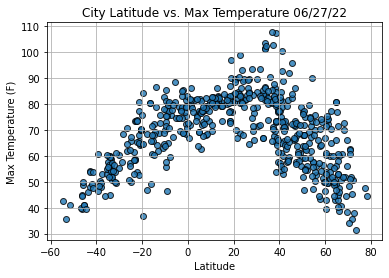

In [19]:
# import time module
import time

# build the scatter plot for latitude vs. max temp
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/Fig1.png")

# show plot
plt.show()